In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
from skimage.color import rgb2gray
from skimage.viewer import ImageViewer
import matplotlib
import matplotlib.pyplot as plt

import coco
import utils
import model as modellib
import visualize

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

MODEL_DIR = os.path.join(ROOT_DIR, 'colorization_logs')

COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()




/Users/yongjiang/anaconda/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "
/Users/yongjiang/PycharmProjects/tensorflow/tfenv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
# Create Mask RCNN to feed into other models
m_rcnn_model = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

#Load weights trained on MS-COCO
m_rcnn_model.load_weights(COCO_MODEL_PATH, by_name=True)

# Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

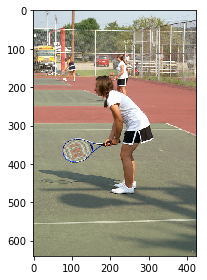

In [4]:
# Test the result of 
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
img = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image_gray = rgb2gray(img)
image = np.zeros((image_gray.shape[0], image_gray.shape[1], 3))
skimage.io.imshow(img)

for i, row in enumerate(image_gray):
    for j, pixel in enumerate(row):
        image[i][j] = [pixel/30, pixel/30, pixel/30]



# Run detection
# results = m_rcnn_model.detect([image], verbose=1)

[[ 87 141 378 588]
 [259   0 339  92]
 [282 611 347 639]
 [256  71 286  96]
 [262 529 363 629]
 [247  91 311 145]
 [278 599 297 608]
 [240   0 262  16]]


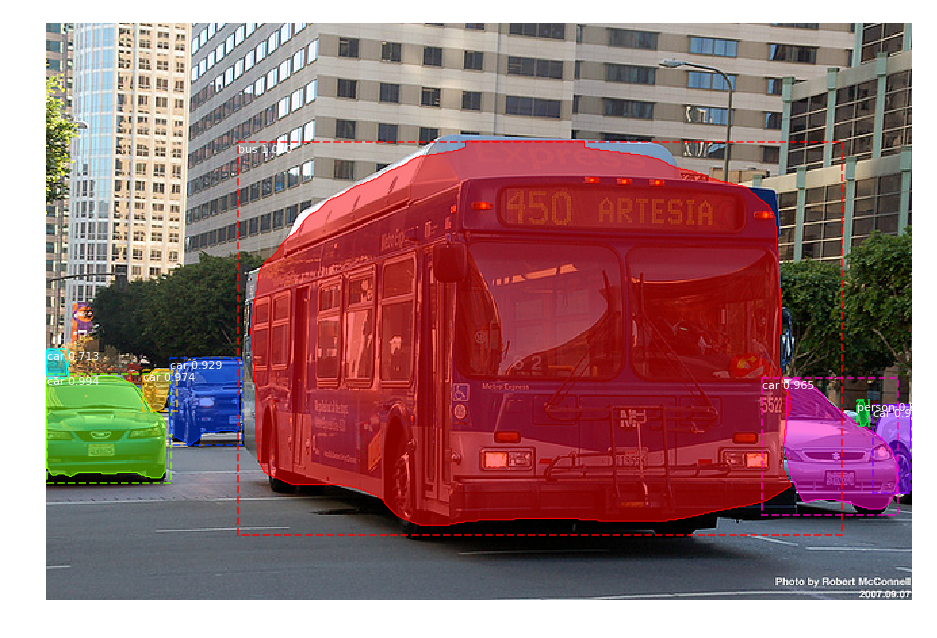

In [30]:
viewer = ImageViewer(image_gray)
viewer.show()
r = results[0]
print("{}".format(r['rois']))
visualize.display_instances(img, boxes=r['rois'], masks=r['masks'], class_ids=r['class_ids'], 
                            class_names=class_names, scores=r['scores'])